# **Lab 5-Bayesian Learning and Bayes Nets**

**Naïve Bayes is based on Bayes theorem which is supervised and depends on the probabilities of the events to occur. Naïve Bayes is considered to be naïve as it does not hold any dependency with two attributes from the same class**

In [ ]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

In [ ]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [ ]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

In [ ]:

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:

data = pd.read_csv("https://raw.githubusercontent.com/BenCoke12/DMMLG3/main/Breast_Cancer.csv")
data.head() #Display the top five rows of the DataFrame by default
data.head(10)# Displays top 10 rows of the dataframe.


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
5,51,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,18,2,89,Alive
6,51,White,Married,T1,N1,IIA,Well differentiated,1,Regional,8,Positive,Positive,11,1,54,Alive
7,40,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,9,1,14,Dead
8,40,White,Divorced,T4,N3,IIIC,Poorly differentiated,3,Regional,103,Positive,Positive,20,18,70,Alive
9,69,White,Married,T4,N3,IIIC,Well differentiated,1,Distant,32,Positive,Positive,21,12,92,Alive


In [ ]:

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(data[["Race", "Marital Status", "T Stage ", "N Stage", "6th Stage", "differentiate", "Grade", "A Stage", "Estrogen Status", "Progesterone Status", "Status"]])
data[["Race", "Marital Status", "T Stage ", "N Stage", "6th Stage", "differentiate", "Grade", "A Stage", "Estrogen Status", "Progesterone Status", "Status"]] = enc.transform(data[["Race", "Marital Status", "T Stage ", "N Stage", "6th Stage", "differentiate", "Grade", "A Stage", "Estrogen Status", "Progesterone Status", "Status"]])



In [ ]:
data


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,2.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,4,1.0,1.0,24,1,60,0.0
1,50,2.0,1.0,1.0,1.0,2.0,0.0,2.0,1.0,35,1.0,1.0,14,5,62,0.0
2,58,2.0,0.0,2.0,2.0,4.0,0.0,2.0,1.0,63,1.0,1.0,14,7,75,0.0
3,58,2.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,18,1.0,1.0,2,1,84,0.0
4,47,2.0,1.0,1.0,0.0,1.0,1.0,3.0,1.0,41,1.0,1.0,3,1,50,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,9,1.0,1.0,1,1,49,0.0
4020,56,2.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0,46,1.0,1.0,14,8,69,0.0
4021,68,2.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0,22,1.0,0.0,11,3,69,0.0
4022,58,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,44,1.0,1.0,11,1,72,0.0


In [ ]:
dataset_2 = data[['N Stage','Reginol Node Positive','T Stage ','Tumor Size','Regional Node Examined']]
# dataset_2.head()
dataset_2.to_csv('Dataset_2.csv',index=False) # Dataset Containing top 5 Features for 1 class

In [ ]:
dataset_2

,N Stage,Reginol Node Positive,T Stage,Tumor Size,Regional Node Examined
0,0.0,1,0.0,4,24
1,1.0,5,1.0,35,14
2,2.0,7,2.0,63,14
3,0.0,1,0.0,18,2
4,0.0,1,1.0,41,3
...,...,...,...,...,...
4019,0.0,1,0.0,9,1
4020,1.0,8,1.0,46,14
4021,0.0,3,1.0,22,11
4022,0.0,1,1.0,44,11


In [ ]:
dataset=data.loc[:, data.columns != '6th Stage']#removing 6th stage column from original dataset to be used for prediction
dataset.head()
y=data['6th Stage']

**Feature selection using test_train_split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2816, 15), (1208, 15), (2816,), (1208,))

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor #not this
from sklearn.tree import DecisionTreeClassifier #not this
from sklearn.ensemble import RandomForestClassifier #not this
from sklearn import svm
from sklearn.svm import SVC

# **Multinomial Naive Bayes**

**The attributes required for this classification are the frequency of the words that are converted from the text document.This model is useful for document classification**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

multiNB = MultinomialNB(alpha=0.0)
multiNB.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


MultinomialNB(alpha=0.0)

In [ ]:
y_pred = multiNB.predict(X_test)
y_pred.shape

(1208,)

In [ ]:
accuracy_score(y_pred, y_test)

0.8253311258278145

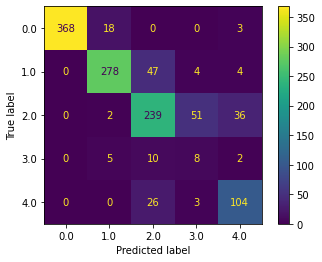

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cmd.from_estimator(multiNB, X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97       389
         1.0       0.92      0.83      0.87       333
         2.0       0.74      0.73      0.74       328
         3.0       0.12      0.32      0.18        25
         4.0       0.70      0.78      0.74       133

    accuracy                           0.83      1208
   macro avg       0.70      0.72      0.70      1208
weighted avg       0.86      0.83      0.84      1208



In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

print(multilabel_confusion_matrix(y_test, y_pred))

[[[ 819    0]
  [  21  368]]

 [[ 850   25]
  [  55  278]]

 [[ 797   83]
  [  89  239]]

 [[1125   58]
  [  17    8]]

 [[1030   45]
  [  29  104]]]


In [ ]:
import sklearn.metrics as skmet

skmet.f1_score(y_test, y_pred, average='micro')

0.8253311258278145

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

calibrator = CalibratedClassifierCV(multiNB, cv='prefit')
model=calibrator.fit(X_train, y_train)

y_train_pred = model.predict_proba(X_train)
y_test_pred = model.predict_proba(X_test)

model.predict_proba(X_test)

array([[0.01162256, 0.04428453, 0.91134544, 0.00982522, 0.02292225],
       [0.01202823, 0.48557157, 0.46608842, 0.0104454 , 0.02586639],
       [0.01512813, 0.05764153, 0.86769778, 0.03023798, 0.02929459],
       ...,
       [0.01040133, 0.8981444 , 0.06259535, 0.00874278, 0.02011615],
       [0.81704847, 0.10390315, 0.05374768, 0.00766385, 0.01763685],
       [0.01909632, 0.07281717, 0.81345488, 0.05769904, 0.03693258]])

In [ ]:
skmet.roc_auc_score(y_test, y_test_pred, average='macro', multi_class='ovo')

0.9085304819463651

# **Gaussian Naive Bayes**

**Gaussian Naive Bayes algorithm is used when the features are continuous in nature. In Gaussian Naïve Bayes, continuous values associated with each feature are assumed to be distributed according to a Gaussian distribution (Normal distribution)**

In [ ]:
from sklearn.naive_bayes import GaussianNB


gaussianNB = GaussianNB()
gaussianNB.fit(X_train, y_train)


GaussianNB()

In [ ]:
y_pred = gaussianNB.predict(X_test)
y_pred.shape

(1208,)

In [ ]:
accuracy_score(y_pred, y_test)

0.9908940397350994

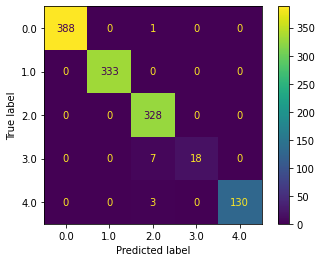

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cm=cmd.from_predictions(y_test, y_pred)

In [ ]:
cm=confusion_matrix(y_test.ravel(), y_pred.ravel())
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

print(TN,FN,TP,FP)

388 0 333 0


In [ ]:
from sklearn.metrics import confusion_matrix
cmd=confusion_matrix(y_test,y_pred)
cmd

array([[388,   0,   1,   0,   0],
       [  0, 333,   0,   0,   0],
       [  0,   0, 328,   0,   0],
       [  0,   0,   7,  18,   0],
       [  0,   0,   3,   0, 130]])

In [ ]:
FP = cmd.sum(axis=0) - np.diag(cmd)  
FN = cmd.sum(axis=1) - np.diag(cmd)
TP = np.diag(cmd)
TN = cmd.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(TPR,TNR,PPV,NPV,FPR,FNR,FDR,ACC)

[0.99742931 1.         1.         0.72       0.97744361] [1.     1.     0.9875 1.     1.    ] [1.         1.         0.96755162 1.         1.        ] [0.99878049 1.         1.         0.99411765 0.99721707] [0.     0.     0.0125 0.     0.    ] [0.00257069 0.         0.         0.28       0.02255639] [0.         0.         0.03244838 0.         0.        ] [0.99917219 1.         0.99089404 0.9942053  0.99751656]


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()
print(tn,fp,fn,tp)

388 0 0 333


In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

print(multilabel_confusion_matrix(y_test, y_pred))

# **Categorical Bayes Net**

**The categorical Naive Bayes classifier is suitable for classification with discrete features that are categorically distributed.**

In [ ]:
from sklearn.naive_bayes import CategoricalNB


catNB = CategoricalNB()
catNB.fit(X_train, y_train)


In [ ]:
y_pred = catNB.predict(X_test)
y_pred.shape

In [ ]:
accuracy_score(y_pred, y_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cmd.from_estimator(catNB, X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

print(multilabel_confusion_matrix(y_test, y_pred))

# **Complement Naive Bayes**

**In complement naive bayes calculate probability of item belonging to all classes. For imbalanced datasets. Good for text classification, not good for this use - accuracy of ~ 0.5.**

In [ ]:
from sklearn.naive_bayes import ComplementNB

compNB = ComplementNB(alpha=0.0)
compNB.fit(X_train, y_train)

In [ ]:
y_pred = compNB.predict(X_test)
y_pred.shape

In [ ]:
accuracy_score(y_pred, y_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cmd.from_estimator(compNB, X_test, y_test)

In [ ]:

FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [ ]:
 print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

print(multilabel_confusion_matrix(y_test, y_pred))

In [ ]:
import sklearn.metrics as skmet

skmet.f1_score(y_test, y_pred, average='micro')

# Bernoulli Naive Bayes

Bernoulli designed for binary classifications. Works ok targeting 6th Stage, works better when set to target Estrogen Status.

In [ ]:
from sklearn.naive_bayes import BernoulliNB

bernNB = BernoulliNB(alpha=0.0)
bernNB.fit(X_train, y_train)

In [ ]:
y_pred = bernNB.predict(X_test)
y_pred.shape

In [ ]:
accuracy_score(y_pred, y_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cmd.from_estimator(bernNB, X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

print(multilabel_confusion_matrix(y_test, y_pred))

In [ ]:
import sklearn.metrics as skmet

skmet.f1_score(y_test, y_pred, average='micro')

| Naive Bayes Algorithm | Accuracy | TP | FP | TN | TP | Sensitivity | Specificity | Precision | Recall | RoC AUC |
| ----------- | ----------- |--|--|--|--|--|--|--|--|--|
| Multinomial| 0.825 ||||||||||
| Gaussian| 0.991 ||||||||||
|Complement|0.537 ||||||||||
|Bernoulli| 0.813 ||||||||||
|Categorical| 0.967 |||||||||